[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zhimingkuang/Harvard-AM-115/blob/main/02_numerics/ode_function.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# Create an ODE function
def f(t, y, r):
    """Python implementation of MATLAB ode45

    Args:
        t (float): 1-D independent variable (time)
        y (numpy.ndarray): N-D vector-valued function (state)
        r (float): constant in ODE

    Returns:
        numpy.ndarray: differential equation
        
    """
    
    ydot = r*y**2
    
    return ydot

In [3]:
# An example illustrating the definition of a function for use in solve_ivp
def ode_function():
    """Main function to define, solve and plot an ODE solution
    
    """
    
    # Set initial condition and constant
    y0 = 1.0
    r = -1.0
    
    # Solve ODE with RK45
    sol = solve_ivp(lambda t,y: f(t,y,r), [0,5], [y0], t_eval=np.linspace(0,5,25))
    # Unpack solution
    t, y = sol.t, sol.y
    
    # Plot solution
    fig, ax = plt.subplots(1,1,figsize=(9,7))

    plt.plot(t, y[0,:], '-o', linewidth=1.5, mfc='none', ms=5.5, mew=1.5)

    # Set axes labels
    ax.set_xlabel(r'$t$')
    ax.set_ylabel(r'$y$')

    plt.show()

In [4]:
# Customize for matplotlib
# If interested in the matplotlib object hierarchy, check: https://realpython.com/python-matplotlib-guide/
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['mathtext.default'] = 'regular'
# Change font size: http://www.futurile.net/2016/02/27/matplotlib-beautiful-plots-with-style/
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 20

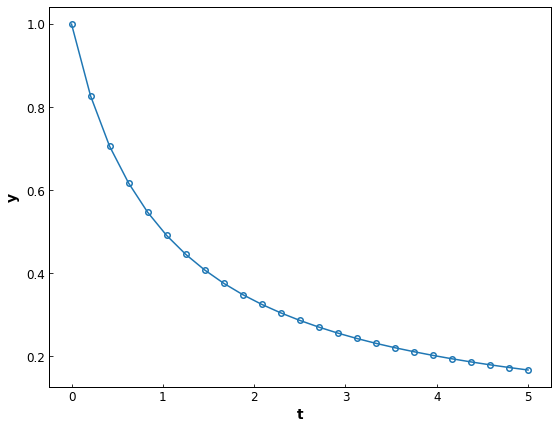

In [5]:
# Call main function to define/solve/plot ODE solution
ode_function()

We can also use the custom written `ode45` in Python to integrate ODE.

In [6]:
from scipy.integrate import ode

In [7]:
# Creating a function equivalent to ode45 in Matlab
def ode45(f, tint, y0, rtol=1e-9):
    """Python implementation of MATLAB ode45

    Args:
        f (function): differential equation to solve
        tint (list): time interval endpoints
        y0 (list): initial condition
        rtol (float): relative tolerance

    Returns:
        tt (list): time intervel
        rr (list): array of solutions (theta, dtheta)
        
    """
    
    r = ode(f).set_integrator('zvode', method='bdf',rtol=rtol)
    r.set_initial_value(y0, tint[0])
    dt = (tint[1]-tint[0])/100
    t1 = tint[1]
    tt = []
    rr = []
    while r.successful() and r.t < t1:
        tt.append(r.t+dt)
        rr.append(np.real(r.integrate(r.t+dt)))
        
    return tt, rr

In [8]:
# Create an ODE function
def f(t, y, r):
    """Python implementation of MATLAB ode45

    Args:
        t (float): 1-D independent variable (time)
        y (numpy.ndarray): N-D vector-valued function (state)
        r (float): constant in ODE

    Returns:
        numpy.ndarray: differential equation
        
    """
    
    ydot = r*y**2
    
    return ydot

In [9]:
# An example illustrating the definition of a function for use in solve_ivp
def ode_function():
    """Main function to define, solve and plot an ODE solution
    
    """
    
    # Set initial condition and constant
    y0 = 1.0
    r = -1.0
    
    # Solve ODE with custom ode45
    t,y = ode45(lambda t,y: f(t,y,r), [0,5], y0)
    
    # Plot solution
    fig, ax = plt.subplots(1,1,figsize=(9,7))

    plt.plot(t, y, '-o', linewidth=1.5, mfc='none', ms=5.5, mew=1.5)

    # Set axes labels
    ax.set_xlabel(r'$t$')
    ax.set_ylabel(r'$y$')

    plt.show()

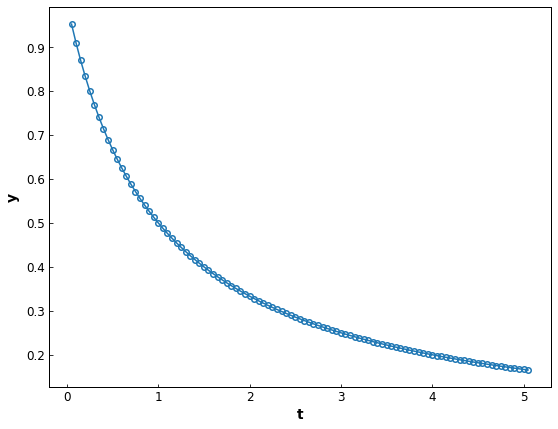

In [10]:
# Call main function to define/solve/plot ODE solution
ode_function()